<table style="width: 100%; border-collapse: collapse; border: none;">
    <tbody>
        <tr>
            <td style="width: 46.9863%; border: none;">
                <div style="text-align: left;"><span style="font-family: Helvetica;"><em><strong><span style="font-size: 18px;">Fabio Caironi</span></strong><span style="font-size: 18px;"><br></span><span style="color: rgb(166, 166, 166); font-size: 18px;">Bc. in Mathematics<br>MSc. student of Data Science and Economics</span></em></span></div>
            </td>
            <td style="width: 44.4749%; border: none;">
                <div data-empty="true" style="text-align: right;"><span style="font-family: Helvetica; font-size: 18px;">Universit&agrave; degli Studi di Milano</span></div>
            </td>
            <td style="width: 8.5388%; border: none;">
                <div style="text-align: right;">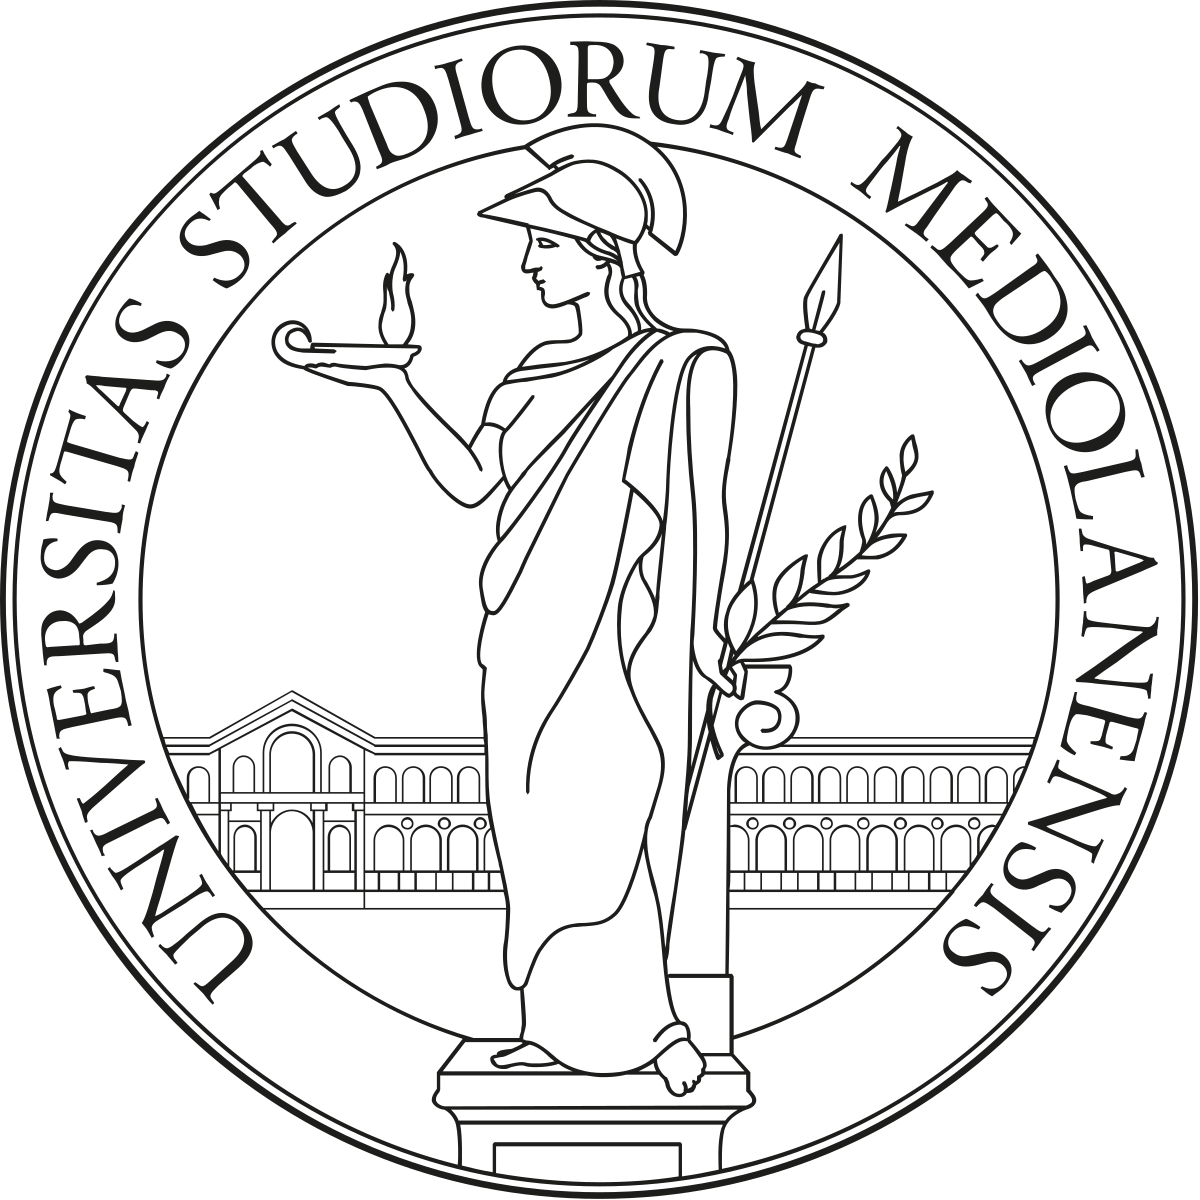</div>
            </td>
        </tr>
    </tbody>
</table>
<p><br></p>

<hr>

<h1><span style="font-size: 40px;">Ridge Regression on California Housing dataset</span></h1>

# Index
<strong><span style="font-size: 20px;">Introduction</span></strong>
<hr>

<strong><span style="font-size: 20px;">I. Theoretical background</span></strong>
1. [**Ridge regression**](#Ridge-regression)
2. [**Principal components**](#Principal-components)
3. [**Scale sensitiveness**](#Scale-sensitiveness)
4. [**Pre-processing**](#Pre-processing)
5. [**Cross validation**](#Cross-validation)
<hr>

<strong><span style="font-size: 20px;">II. Function library</span></strong>
1. [**Ridge learner**](#Ridge-learner-with-matrix-algebra)
2. [**Square loss and mean error**](#Square-loss-and-mean-error)
3. [**Pre-processing**](#Pre---processing)
4. [**Principal component decomposition**](#Principal-Component-Decomposition)
5. [**Cross validation**](#Cross-Validation)
6. [**Examples of usage**](#Examples)
<hr>

<strong><span style="font-size: 20px;">III. Data acquisition and analysis</span></strong>
1. [**Null values**](#Null-values)
2. [**Categorical variables**](#Categorical-variables)
3. [**Collinearity**](#Collinearity)
4. [**Map**](#Map)
<hr>

<strong><span style="font-size: 20px;">IV. Learning of median house value predictors</span></strong>
1. [**Design matrix and labels**](#Design-matrix-and-labels)
2. [**PC's selection**](#PC's-selection)
3. [**Compared performances**](#Compared-performances)
    1. [*Pre-processing combined with ridge*](#Pre-processing-+-Ridge)
    2. [*Pre-processing combined with PCD and ridge*](#Pre-processing-1-+-PCD-+-Pre-processing-2-+-Ridge)
<hr>

<strong><span style="font-size: 20px;"><a href='#Conclusion'>V. Conclusion</a></span></strong>

<hr>

<strong><span style="font-size: 20px;"><a href='#Bibliography'>VI. Bibliography</a></span></strong>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Introduction
Regularized Loss Minimization (RLM for short) is a class of Machine Learning problems which add a regularization, or *stabilizer*, to the empirical risk minimizer (ERM) functional. Their aim is double: on the one side, they provide a solution to ill-posed problems, like those that involve inverting a singular matrix; on the other side, they help reducing overfitting and controlling the bias-variance trade off. Precisely, the regularizer is designed to cut down the variance error by introducing a little bias. In this sense, as we anticipated, the regularization is also reffered to as stabilizer, where by "stability" we mean the property of a predictor not to be 'too much' dependent on a particular draw of the training set from the underlying distribution.

In this project, we will consider linear regression and RLM, a.k.a. ridge regression. Ridge regression is particularly suited for problems of multicollinearity, where, due to the fact that the moment matrix is nearly singular, the ordinary least squares weight is highly sensitive to perturbations of the training set. The example we provide here is the application of ridge regression to a dataset with several highly-correlated features, hence a good candidate for the regularized method.

The structure of the notebook is the following: first, we propose a review of the most relevant theoretical concepts behind the methods that will be used in the practical part. Along with ridge regression, we will use principal component decomposition to try and reduce the error. We will explore the problem of scale-sensitiveness of ridge learner providing several solutions and, in the last part, applying them and comparing outcomes. In the middle part, python functions are defined and explained and the california housing dataset is loaded and inspected.
 
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h1><center><span>Theoretical background</span></center></h1>

## Ridge regression
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

The ridge learner is the solution of the $\ell\text{-} 2$ RLM problem with the square loss, i.e.:
$$\begin{split} \mathbf{w}_{\alpha} & = \  \underset{\mathbf{w}\in \mathbb{R}^d}{\text{argmin}} \Big( \| X\mathbf{w}-\mathbf{y}\|^2_2+\alpha\| \mathbf{w}\|^2_2\Big) \\
& = \ \underset{\mathbf{w}\in \mathbb{R}^d}{\text{argmin}} \Big(\sum_{i=1}^m(\mathbf{x}_i^T\mathbf{w}-y_i)^2 + \alpha\sum_{j=1}^d w_j^2 \Big)
\end{split}
\tag{1}
$$
The $\ell\text{-} 2$ penalization $\alpha\| \mathbf{w}\|^2_2$ is sometimes referred to as Tikhonov regularization, named after the Russian mathematician Andrey Tikhonov.

Here and in what follows, we will denote by $X=\begin{bmatrix} \mathbf{x_1} \\ \dots \\ \mathbf{x_m} \end{bmatrix} \in \mathbb{R}^{m\times d} $  the *design matrix*, whose rows $\mathbf{x_i}^T, \forall i=1,\dots,m$  are the data points and whose columns $X_j, \forall j=1,\dots,d$  are the features, or attributes. 
<br> The minimization problem is convex and admits a unique solution in the form:  
$$ \mathbf{w}_{\alpha}=(\alpha I_d + X^TX)^{-1}X^T\mathbf{y} \tag{2}$$
As a remedy for ill-posed problems, the regularization term also guarantees the invertibility of the matrix

Computationally, achieving $\mathbf{w}_{\alpha}$ with matrix algebra amounts to: 

|Operation|Time|
|:---|:---:|
| $d\times d$ matrix summation | $O(d^2)$ |
| $d\times m$,  $m\times d$,  $d\times d$ matrix multiplication | $O(md^2)$ |
| $d\times d$ matrix inversion | $O(d^3)$ (Gauss-Jordan) |

which is $O(md^2)+O(d^3)$, a quite reasonable time if we're dealing with small data, as in our case $m\sim 10^4, \ d\sim 10^1$.
For this reason, we don't need iterative optimization algorithms to solve our problem.
<br><br>The predictor is then simply
$$h_{\alpha}(\mathbf{x})=\mathbf{w}_{\alpha}^T\mathbf{x}$$
i.e. the linear prediction with the identity as activation function. Indeed, ridge regressor and ordinary linear regressor differ only in that the former is not purely an empirical risk minimizer w.r.t. the square loss.
<hr>

## Principal components
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

The *principal component regression* is one additional way to address the problem of overfitting. It involves 'compressing' the space of features by selecting the $p$ first principal components and using them as new features. We shall here briefly recall the theory and intuition behind the principal component decomposition.
<br>The underlying idea of principal component decomposition is to retrieve the directions along which the data vary the most, or equivalently the directions with highest sample variance. The aim is to reduce the dimension of the space of features efficiently, namely loosing the least possible information. Intuitively, one can imagine to find the ellipsoid that best fits the data and take its longest axes as the principal components.
<br>Let's set out the notation. We call $\mathbf{t}^{(1)},\dots, \mathbf{t}^{(p)}$ The $m$-dimensional vectors that define the first $p$ principal components, $p\leq d$. We want the $\mathbf{t}$'s to be linear combinations of the features:
$$\mathbf{t}^{(k)}= \sum_{j=1}^d w^{(k)}_jX_j \quad \forall k=1,\dots,p$$
where $\|\mathbf{w}^{(k)}\|=1 \ \forall k$.  
<br>If we stack the $\mathbf{t}^{(k)}$'s forming the matrix $T^{(p)}:=\big[\mathbf{t}^{(1)},\dots, \mathbf{t}^{(p)}\big]$ and the $\mathbf{w}^{(k)}$'s forming the matrix $W^{(p)}:=\big[\mathbf{w}^{(1)},\dots ,\mathbf{w}^{(p)}\big]$, we get the equivalent matrix formula:
$$T^{(p)}=XW^{(p)} $$
<br>To compute any of the weight vectors $\mathbf{w}^{(k)}$ one can iteratively solve the **variance maximization** problems. For instance, the first principal component's weight, assuming that *predictors are mean-centred*, is given by:
$$\mathbf{w}^{(1)}=\underset{\| \mathbf{w}\|=1}{\text{argmax}}\big(\|X\mathbf{w}\|^2\big) = \ \dots \ = \underset{\mathbf{w}}{\text{argmax}}\Big(\frac{\mathbf{w}^TX^TX\mathbf{w}}{\mathbf{w}^T\mathbf{w}}\Big) $$
The right-hand quotient is also known as Rayleigh quotient and, for a positive semidefinite matrix like $X^TX$ has its maximum at the eigenvector associated to the largest eigenvalue of the matrix, the latter being the maximised quantity. 
<br>The subsequent components, up to the $d^{th}$, can then be recovered by updating $X$, via subtracting its previous principal component, and solving again the maximization problem. It turns out that the optimal weights as gathered in the full matrix $W^{(d)}=:W$ (full principal component decomposition) are the eigenvectors of $X^TX$ and are sorted according to a descending order w.r.t. the associated eigenvalues.
<br><br>In practice, to obtain the $W$ matrix, we perform the *singular value decomposition*, thanks to which any matrix $X$ can be factorized as:
$$X=U\Sigma W^T \tag{3}$$
where the columns of the $m\times m$ matrix $U$ are the eigenvectors of $XX^T$  and the columns of the $d\times d$ matrix $W$ are the eigenvectors of $X^TX$. In addition, $U$ and $W$ are orthonormal. Finally, $\Sigma$ is a diagonal rectangular matrix whose $d$ diagonal elements $\sigma_1,\dots,\sigma_d$ are the square root of the eigenvalues of $X^TX$ and are called **singular values**.
<br>This way, one can easily retrieve the first $p$ principal components:
$$ T=XW=U\Sigma W^TW = U\Sigma \quad \text{and} $$
$$ T^{(p)}=XW^{(p)}=U\Sigma^{(p)}=\big[ \sigma_1U_1 \ , \ \sigma_2U_2 \ , \ \dots \ , \ \sigma_pU_p\big]  \tag{4} $$
where $\sigma_j$'s are the singular values and $U_j$'s the columns of $U$.
<br>Lastly, the larger an eigenvalue of $X^TX$ (and therefore the larger a singular value), the higher the maximised variance of the associated principal component. So, singular values are also useful to detect the first $p$ most meaningful principal components, by just looking at their ranking.

Throughout the project we will use both the PCD and the ridge regressor, we will combine them and apply different pre-processing methods and finally compare performances.
<hr>

## Scale sensitiveness
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

Regularized loss minimization methods happen to be **scale dependent** with respect to a training set $S$. The scale of the features $X_1,\dots , X_d$, as captured by their range, influences not only the prediction rule (e.g. the weights estimate in regression) but also the prediction itself. For instance, in the case of ridge regression on our dataset, the prediction $\mathbf{y}=X\mathbf{w}_{\alpha, S}$ will depend on whether in $S$ the values of the feature `median_house_value` are expressed in dollars or else in tens of thousands of dollars. Such a sensitiveness of the ridge learner can produce bad learners and raise both training and test error, especially when features are on highly different scales. <br>
The main outcome of the penalization is to shrink the big weights more than the small ones. This turns out to be a flaw when features are given on different scales, since, in general, the higher is the scale of a feature, the lower is its percentage contribute to the prediction (and vice versa) and thus penalties are no longer acting uniformly on all features. <br>
A formal representation of what have been mentioned above, in the setting of ridge regression, follows here. Starting from the _ordinary least squares_ regressor $OLS(S)=\underset{\mathbf{w\in\mathbb{R}^d}}{\text{argmin}}\|X\mathbf{w}-y\|^2=(X^TX)^{-1}X^T\mathbf{y}$ we observe that it reacts to any resizing of the features by properly rescaling the affected weights so that the prediction remains unchanged. Precisely, if we resize the k<sup>th</sup> feature by a constant $z_k$ the associated weight changes by a factor of $\frac{1}{z_k}$ : <br>
Setting $Z=\text{diag}(1,\dots,z_k,\dots,1)$,
$$ \begin{split} 
 \hat{\mathbf{w}}^Z= & \ [(XZ)^T(XZ)]^{-1}(XZ)^T\mathbf{y} \\
= & \ [Z(X^TX)Z]^{-1}ZX^T\mathbf{y} \\
= & \ Z^{-1}(X^TX)^{-1}Z^{-1}ZX^T\mathbf{y} \\
= & \ Z^{-1}(X^TX)^{-1}X^T\mathbf{y} = Z^{-1}\hat{\mathbf{w}} \\
= & \ \begin{bmatrix} \hat{w}_1 , & \dots , & \frac{1}{z_k}\cdot\hat{w}_k , & \dots , & \hat{w}_d \end{bmatrix}
\end{split}
$$ 
Hence, the prediction $\hat{\mathbf{y}}$ is still the same:
$$ \hat{\mathbf{y}}=(XZ)(Z^{-1}\hat{\mathbf{w}}) = X\hat{\mathbf{w}} $$

When adding the Tikhonov penalty, instead, we can't get a closed formula on weights rescaling, because the predictor depends on the parameter $\alpha$. We try to recover the effect of a resizing of the j<sup>th</sup> feature by looking at the minimization problem:
$$ \begin{split}
 \hat{\mathbf{w}}^Z_{\alpha}= & \ \underset{\mathbf{w\in\mathbb{R}^d}}{\text{argmin}}\Big( \| (XZ)\mathbf{w}-\mathbf{y}\|^2 + \alpha\| \mathbf{w}\|^2 \Big) \\
 = & \ \underset{\mathbf{w\in\mathbb{R}^d}}{\text{argmin}}\Big(\sum_{i=1}^m (\mathbf{x}_i^TZ)\mathbf{w}-y_i)^2+\alpha\sum_{k=1}^dw_i^2 \Big) \\
 = & \ \underset{\mathbf{w\in\mathbb{R}^d}}{\text{argmin}}\Big(\sum_{i=1}^m \big(\sum_{j\neq k}^d x_{ij}w_j+z_kx_{ik}w_k-y_i\big)^2+\alpha\sum_{k=1}^dw_i^2 \Big) \\
  = & \ \underset{\mathbf{w\in\mathbb{R}^d}}{\text{argmin}}\Big(\sum_{i=1}^m \big(\sum_{j=1}^d x_{ij}w_j-y_i+(z_k-1)x_{ik}w_k\big)^2+\alpha\sum_{k=1}^dw_i^2 \Big) \\
    = & \ \underset{\mathbf{w\in\mathbb{R}^d}}{\text{argmin}}\Big(\| X\mathbf{w}-\mathbf{y} \|^2 + \sum_{i=1}^m\big[ \ 2(z_k-1)x_{ik}w_k\big(\sum_{j=1}^d x_{ij}w_j-y_i\big)+(z_k-1)^2x_{ik}^2w_k^2 \big]+  \\ 
    & \ +\alpha\sum_{k=1}^dw_i^2 \Big) \\
 = & \ \underset{\mathbf{w\in\mathbb{R}^d}}{\text{argmin}}\Big(\| X\mathbf{w}-\mathbf{y} \|^2 + 2(z_k-1)w_k\sum_{i=1}^m \sum_{j=1}^d \big( x_{ik}(\mathbf{x}_i^T\mathbf{w}-y_i)\big) + \\
 & \ + w_k^2(z_k-1)^2\|X_k\|^2 +\alpha\sum_{k=1}^dw_i^2 \Big)
\end{split}
$$
We see that a penalization on the squared k<sup>th</sup> weigth proportional to $z_k^2$ arises along with another correction term, also depending on $z_k$. In particular, if $z_k<1$ (downsizing) the additional penalty on the k<sup>th</sup> weigth $w_k^2(z_k-1)^2\|X_k\|^2$ is more affected by the regularization term $\alpha w_k^2$ than it is when $z_k>1$, i.e. when feature is on a large scale. Without the Tikhonov penalty, the last terms would be completely absorbed by a rescaling of the k<sup>th</sup> weight, without affecting the other weights, as we've seen in the OLS case.
<hr>

## Pre-processing
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

Given that the scale of features represent a threat to our ridge learner's functionality, we thereby take charge of applying transformations to our data to make it consistent and ready for the learner. This step is usually referred to as **pre-processing**. We anticipate that, in order to prevent the introduction of a bias, pre-processing will be carried out separately on training and test set whenever our dataset will be splitted. Go to [Cross Validation](#Cross-Validation). In addition, we ramerk that 'normalization' invalidates the representability of the output weights, meaning that we will need to perform linear combinations of them in order to recover the true contribute of each feature.
<br>Several types of 'normalization' have been discussed in literature so far. Here we propose the main four: ***Rescaling***, ***Mean-centering***, ***$\rho$-standardization*** and ***$\Sigma$-standardization***.

#### Rescaling
Rescaling amounts to resizing all features to a common range $[a,b]$ via a linear function. The affine transformation is defined as:
$$T^r_{a,b}(x_{ij})=b\cdot \frac{x_{ij}-m_j}{M_j-m_j}-a\cdot \frac{x_{ij}-M_j}{M_j-m_j} \tag{5} $$
where $m_j = \underset{h}{\min}x_{hj}$  and   $M_j = \underset{h}{\max}x_{hj}$.  
Then, one can easily show that $T^r_{a,b}$ maps the space of each feature to $[a,b]\subset \mathbb{R}$. In addition, the main statistics like mean and standard deviation are also properly rescaled along with the features, though they are not bound to a fixed interval.
<br>In summary, with rescaling we ensure that all features fit a given range and therefore share the order of magnitude.

#### Mean-centering
Subtracting the mean from the features is another very common pre-processing method. In particular, as we've seen, it is advised before performing PCD; but it is also required if we wish to work with data [without introducing an intercept](#Features-and-labels-centering). The transformation is:
$$T^c(x_{ij})=x_{ij}-\mu_j \quad \ \text{where } \mu_j=\frac1m\sum_{i=1}^m x_{ij} \tag{6}$$ 

#### $\rho$-standardization
$\rho$-standardization or just *standardization* is one other popular way of addressing the problem of scale-sensitiveness. It was firstly used by Marquardt and Snee (1975) and is widely employed by statisticians. It amounts to dividing the features by their sample standard deviation:
$$T^{\rho}(x_{ij})=\frac{x_{ij}}{\sigma_j} \quad \ \text{where } \sigma_j = \sqrt{\frac1m \sum_{i=1}^m(x_{ij}-\mu_j)^2} \tag{7}$$
This method is usually paired with mean-centering in the composition $T^{c,\rho}:=T^{\rho}\circ T^c$. Sardy (2008) showed that RLM predictors trained with mean-centered and $\rho$-standardized data are scale-invariant.

#### $\Sigma$-standardization
One further method advised by Sardy (2008) is called $\Sigma$-standardization and consists of post-multiplying the centered design matrix $\overline{X}$ by the square root diagonal matrix of the inverted moment matrix $(\overline{X}^T \overline{X})^{-1}$. The centered design matrix is simply the design matrix $X$ whose features have been mean-centered with $T^c$. Therefore, in symbols, the transformation as a matrix function $T^{\Sigma}: \mathbb{R}^{m\times d}\rightarrow \mathbb{R}^{m\times d}$, is written:
$$T^{\Sigma}(X)=\overline{X}\cdot \sqrt{\text{diag}\big[\big(\overline{X}^T\cdot \overline{X}\big)^{-1}\big]} \tag{8}$$
Mean-centering plus $\Sigma$-standardization is proven to yield scale-invariant predictors, just as mean centering plus $\rho$-standardization.


Throughout the operational part, [Learning of median house value predictors](#Learning-of-median-house-value-predictors), we will make use of all these pre-processing methods: we will combine them in order to produce different learners and compare performances. As we will see, not necessarily the good theoretical results of PCD or of some pre-processing method will be transposed to high-performing predictors.


Finally, it is worth mentioning that, with ridge regression, multiplying the labels by a constant do not bring any improvement to the mean squared error; in fact, it doesn't lead to any change at all in the relative MSE w.r.t. hyperparameter tuning, as the following lines show:
$$\begin{split} \hat{\ell}_S(h_{\alpha})_{\mathbf{y}} & = \frac1m \|X\mathbf{w}_{\alpha}-\mathbf{y} \|^2_2 = \frac1m \|X\big((\alpha I_d + X^TX)^{-1}X^T\mathbf{y}\big)-I_m\mathbf{y}\|^2_2 \\
& = \frac1m \|\big(X(\alpha I_d + X^TX)^{-1}X^T-I_m\big)\mathbf{y}\|^2_2 =: \frac1m \|A_{\alpha} \mathbf{y}\|^2_2
\end{split}$$
and $A_{\alpha}$ is a symmetric $m\times m$ matrix that doesn't depend on $\mathbf{y}$. Then:
$$\frac{\hat{\ell}_S(h_{\alpha})_{\mathbf{y}}}{\hat{\ell}_S(h_{\beta})_{\mathbf{y}}} = \frac{\hat{\ell}_S(h_{\alpha})_{c\mathbf{y}}}{\hat{\ell}_S(h_{\beta})_{c\mathbf{y}}} $$

Therefore, when not centering the labels (as required in [Intercept](#Intercept) pt. 2), in this project we will keep them on their original scale ($\sim 10^5$) for the sake of representability. Bear in mind that, for a mean difference of $1\% \ \ (\sim10^3)$ we expect a MSE of $\sim 10^6$ and for a mean difference of $10\% \ \ (\sim 10^4)$ we expect a MSE of $\sim 10^8$. Go to [Data acquisition and analysis](#Data-acquisition-and-analysis) to see the distribution of the labels (column `median_house_value`).

### Intercept
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

The most general linear model $\ \mathbf{y} = \mathbf{w}^T\mathbf{x}+w_0\ $ allows for an intercept, or a *baseline* value that is predicted when all features are set to zero. For instance, in the cal-housing dataset where we applied the rescaling method about the interval $[0,1]$, an intercept can be thought of as the median house value of a block featuring minimum values in all attributes. As this quantity may be reasonably different from $\mathbf{0}$, it is important to find a way to include it. One way to add an intercept without changing the structure of the model $\ \mathbf{y} = \mathbf{w}^T\mathbf{x}\ $ is to insert a feature with all equal values (e.g. $1$): 
$$ \begin{gather}
\tilde{\mathbf{x}}_i := \begin{pmatrix} 1, & x_{i1} , & \dots , &  x_{id}\end{pmatrix} \quad \forall i=1,\dots ,m \\
\tilde{\mathbf{w}} := (w_0,\mathbf{w})=\begin{pmatrix} w_0, & w_1 , & \dots , &  w_d\end{pmatrix} \\
y_i=\tilde{\mathbf{w}}^T\tilde{\mathbf{x}}_i = \mathbf{w}^T\mathbf{x}_i+w_0 \quad \forall i=1,\dots ,m
\end{gather} \tag{9}$$

Without any modification to the ridge regressor, though, the full-length weight vector $\tilde{\mathbf{w}}$ will cause the intercept to receive a penalization as well. Since we introduced an intercept to correct the bias, we don't want it to be penalized. There are two solutions to this problem:
#### Modified ridge learner
After adding a column of ones to $X$, **slightly modify the ridge learner** so that it won't penalize $w_0$. Practically, we remove the term $\alpha w_0^2$ from the mP $(1)$: this modification affects only the regularization term and not the empirical risk:
$$\begin{split} \tilde{\mathbf{w}}_{\alpha} & = \underset{\tilde{\mathbf{w}}=(w_0,\mathbf{w})\in \mathbb{R}^{d+1}}{\text{argmin}} \Big[ \big( \| \tilde{X}\tilde{\mathbf{w}}-\mathbf{y}\|^2_2+\alpha\| \tilde{\mathbf{w}}\|^2_2 \big) -\alpha w_0^2\Big] \\
& = \underset{\tilde{\mathbf{w}}=(w_0,\mathbf{w})\in \mathbb{R}^{d+1}}{\text{argmin}} \Big( \| \tilde{X}\tilde{\mathbf{w}}-\mathbf{y}\|^2_2+\alpha\| \mathbf{w}\|^2_2\Big)
\end{split}$$
where $\tilde{X}=[\mathbf{1}_m,X]$ and $\tilde{X}\tilde{\mathbf{w}} = X\mathbf{w}+w_0\mathbf{1}_m$.
<br>Fortunately, also this mP admits a closed formula as its solution:
$$ \tilde{\mathbf{w}}_{\alpha}=(\alpha \tilde{I}_{d+1} + \tilde{X}^T\tilde{X})^{-1}\tilde{X}^T\mathbf{y} \quad \text{where } \tilde{I}_{d+1}=\text{diag}(0,\mathbf{1}_d) \tag{10}$$
Throughout this project, we will implement and use the adjusted ridge learner with the completed matrix $\tilde{X}$. Go to [Code](#Ridge-learner-with-matrix-algebra)<br>
#### Features and labels centering
Another common method in literature is to **center** features and labels w.r.t. their mean (See [Mean-centering](#Mean-centering)). If the undelying true model is linear, then the predicted label of the average $\overline{\mathbf{x}}:=\frac1m\sum_{i=1}^m\mathbf{x}_i$ is not far from $\overline{y}:=\frac1m\sum_{i=1}^my_i$ (with the assumpion of independent errors this can be proved in a statistical sense). As a consequence, de-meaning the features and the labels yields a small intercept as one could easily provethat won't be 
<hr>

## Cross validation
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

In a learning problem, predictors' perfomances are measured by their ***risk***, which is a metrics of *how much on average they err on the predictions*. The definition of risk is closely related to that of ***loss function*** $\ell$, which is used to measure the distance between a prediction ($\hat{y}$) and the true label ($y$); The ridge learner, as derived from the ordinary least square regressor, uses the square loss:
$$ \ell(y,\hat{y}) = (y-\hat{y})^2$$
In a statistical leaning setting, we imagine our data $(\mathbf{x}_i,y_i) \, \forall i$ as drawn from a probability distribution $\mathcal{D}$ on the cartesian product of the space of predictors $\mathcal{X}$ and the space of labels $\mathcal{Y}$. Here, for a predictor $h:\mathcal{X}\rightarrow \mathcal{Y}$, the risk as verbally defined above has the intuitive definition:
$$\ell_{\mathcal{D}}(h)=\underset{(\mathbf{X},Y)\sim \mathcal{D}}{\mathbb{E}}[\ell(Y,h(\mathbf{X}))]$$
that is, the expected value on $\mathcal{Y}\times h(\mathcal{X})$ of the loss. This quantity is called **statistical risk**.
<br>In practice, we're given a sample set $S\subset\mathcal{X}\times\mathcal{Y}$ of observations $\{(\mathbf{x}_i,y_i)\}_{i=1}^n$, which we assume to be random, and we average the loss over such observation, or examples, to obtain an unbiased estimate of the statistical risk:
$$\hat{\ell}_S(h)=\frac1n\sum_{t=1}^n\ell(y_t,h(\mathbf{x}_t))$$
called **empirical risk**.

But so far we've assumed $h$ to be fixed and known a priori, which is not the right framework when comparing predictors output by one or even many algorithms. If $A(S)$ is the predictor output when algorithm $A$ is run on a sample set $S$ of fixed size $n$, then we might look instead at the **expected risk** of $A(S)$, where expectations are taken w.r.t. a random draw of the training set $S$ from $\mathcal{D}^n$. In symbols:
$$\underset{S\sim \mathcal{D}^n}{\mathbb{E}}[\ell_{\mathcal{D}}(A)] $$
Again, in practice we do not have infinitely many sample sets but only one dataset $D$ that serves both to train a suitable learner and to test it. 

**Cross validation** proposes the following approach to simulate random draws of sample sets.
<br>The dataset $D\in \mathcal{X}\times \mathcal{Y}$ is *randomly partitioned* into $k$ equal sized subsets, or **folds**, $D_1,\dots,D_k$. The CV algorithm has $k$ steps: in the j<sup>th</sup> step, $j=1,\dots,k$ , the fold $D_j$ takes the role of *test set* and the remainig $S^{(j)}=\bigcup_{i\neq j}^kD_i=D\backslash D_j$ the role of *training set*. We train a classifier $h_j=A(S^{(j)})$ on the training set and compute its empirical risk on the test set:
$$\hat{\ell}_{D_j}(h_j)=\frac1{|D_j|}\sum_{(\mathbf{x},y)\in D_j}\ell (y,h_j(\mathbf{x})) \tag{11}$$
Thus, on the one side we used a bunch of pseudo-random sets $S^{(1)},\dots,S^{(k)}$ as a sample from $\mathcal{D}^n$ to feed the agorithm $A$. On the other side, for each trained learner $h_j=A(S^{(j)})$ we used the complementary set $D_j$ as an independent sample from $\mathcal{D}$ to estimate the statistical risk of $h_j$.
 
The last step, in order to recover the CV estimate of the expected risk, is then to average (replacing the expectation) the empirical risks:
$$\mu_{CV}(k,A,D)=\frac1k\sum_{j=1}^k\hat{\ell}_{D_j}(h_j) \tag{12}$$
Obviously, one may also be interested in estimating the variance (or the standard deviation) of the risk. In that case, the sample variance will provide such an estimate:
$$\sigma^2_{CV}(k,A,D)=\frac1k\sum_{j=1}^k\Big(\hat{\ell}_{D_j}(h_j) - \mu_{CV}(k,A,D) \Big)^2 \tag{13}$$
In what follows, we will refer to $\mu_{CV}$ with *CV risk* and to $\sigma^2_{CV}$ with *CV variance*, for brevity.

We will also make use of the following quantity:
$$\mu_{CV}^{\text{train}}(k,A,D)=\frac1k\sum_{j=1}^k\hat{\ell}_{S^{(j)}}(h_j) \tag{14}$$
that is the average empirical risk evaluated on the training sets. It will be useful to study the performances of predictors (go to [Compared performances](#Compared-performances)). Beware of regarding this quantity as an estimate of the statistical risk: the set $S^{(j)}$ is both used to train $A$ and to evaluate the empirical risk, therefore the random draws from $\mathcal{D}$ and from $\mathcal{D}^n$ can no longer be considered independent! 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h1><center><span>Function library</span></center></h1>

<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

In the following, the main python functions for pre-processing, ridge regression, cross validation and PCD are defined.

### Imports
Here are the packages that will be used throughout the notebook:
- `numpy` for performing linear algebra operations on vectors and matrices and for random sampling.
- `pandas` for viewing and manipulating data frames.
- `matplotlib` for plotting results and maps.
- `textwrap` for string stuff.
- `IPython.display` to allow variable referencing in ipython Markdown.

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from numpy import random as rd
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap
from IPython.display import Markdown

### Ridge learner with matrix algebra
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

Implements the ridge learner $(2)$ and the modified ridge learner $(10)$.

In [2]:
def ridge_w(X, y, alpha=0, penalize_intercept=False):
    m = X.shape[0]
    d = X.shape[1]
    
    I = np.identity(d)
    
    # Removes intercept penalization, when there is an intercept and penalize_intercept=False
    if( len(set(X[:,0])) == 1 and not penalize_intercept):
        I[0,0] = 0
    return LA.inv(I*alpha + np.dot(X.T, X)) @ X.T @ y 

<hr>

### Square loss and mean error
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

In [3]:
def sq_loss(y1, y2):
    return (y1 - y2)**2 

In [4]:
def mean_err(y, yfit, loss_fct):
    return np.mean(loss_fct(y,yfit)) 

<hr>

### Pre - processing
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

Here's three functions that implement the types of normalization seen in [Pre-processing](#Pre-processing). All of them accept 5 arguments:
- `X`: the numpy matrix/vector to be pre-processed.
- `demean`: boolean. `True` to enable data de-meaning, `False` to disable. Unused in `rescale`.
- `standardize`: boolean. `True` to enable data $\rho$-standardization. `False` to disable. If `demean` is `True`, standardization will *follow* de-meaning. Only used in `normalize`.
- `interval`: list of 2. Endpoints of the interval to which data will be rescaled. Like $[a,b]$ in (5). Only used in `rescale`.
- `exclude`: list of int, or empty list. Specifies the indexes of features to exclude from pre-processing.

In [5]:
# Implements tranformation (5)
def rescale(X, demean=False, standardize=False, interval=[0,1], exclude=[]):
    if(X.ndim == 1):
        M = np.max(X)
        m = np.min(X)
        if M != m:
            X = (interval[1]*(X-m) - interval[0]*(X-M)) / (M-m)
    else:
        d = X.shape[1]
        ind = [i for i in range(d) if i not in exclude]

        for j in ind:
            M = np.max(X[:,j])
            m = np.min(X[:,j])
            if M != m:
                X[:,j] = (interval[1]*(X[:,j]-m) - interval[0]*(X[:,j]-M)) / (M-m)
    return X

In [6]:
# Implements transformations (6) and (7)
def normalize(X, demean=True, standardize=True, interval=None, exclude=[]):
    if(X.ndim == 1):
        if(demean):
            X = X - X.mean()
        if(standardize):
            dev = X.std()
            if(dev != 0):
                X = X / dev
    else:
        d = X.shape[1]
        ind = [i for i in range(d) if i not in exclude]

        for j in ind:
            if(demean):
                X[:,j] = X[:,j] - X[:,j].mean()
            if(standardize):
                dev = X[:,j].std()
                if(dev != 0):
                    X[:,j] = X[:,j] / dev
    return X

In [7]:
# Implements transformation (8)
def sigma_std(X, demean=True, standardize=False, interval=None, exclude=[]):
    d = X.shape[1]
    ind = [i for i in range(d) if i not in exclude]
    
    X[:,ind] = normalize(X[:,ind], demean=demean, standardize=standardize, exclude=[])
    momX = X[:,ind].T @ X[:,ind]
    
    inverse = LA.inv if LA.det(momX) != 0 else LA.pinv
    
    D2 = np.diag(inverse(momX))
    D2pos = D2.clip(min=0)
    X[:,ind] = X[:,ind] @ np.diag(np.sqrt(D2pos))
    return X

<hr>

### Principal Component Decomposition
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

Extracts the `p` first principal components from matrix `X`. 

In [8]:
def PCD(X, p=None):
    if p is None or p > X.shape[1]:
        p = X.shape[1]
    
    # Decomposition
    U, s, Wt = LA.svd(X, full_matrices=False) # without full matrices the computation is much more speedy!
    
    # Uncomment the following line for checking equation (4)
    # print( np.allclose(X @ Wt.T[:,:p], U[:,:p] * s[:p]) )
    
    return U[:,:p] * s[:p]

<hr>

### Cross Validation
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

The `cv_risk` function is the engine of this project. It envelops a two-stage transformation with PCD and ridge regression and performs cross validation for a given value of `alpha` and a given number of `folds`. For every training and test sets in the *loop*, according to a user-chosen combination of pre-processing operations, it carries out the following ordered steps:
1. Transforms `X_train` and `X_test` via `transf1`.
2. Performs PCD on `X_train` and `X_test`.
3. Transforms `X_train` and `X_test` via `transf2`.
4. Derives the learner.
5. Computes the empirical risk on training and test sets $(11)$.

Any of the first three operations are customizable through the arguments of `cv_risk`, which follow here:
- `learner`. The learning function.
- `X`. The design matrix.
- `y`. The labels vector.
- `seed`. A seed for the random number generator. Setting a seed guarantees the same outcomes when re-running the same cells. It will be passed to the function `partition`. If `None`, no seed is set.
- `loss_fct`. Loss function.
- `PC`. The number of principal components to use. If `None`, PCD is skipped.
- `transf1`. The first trasformation (function).
- `transf2`. The second trasformation (function).
- `**kwargs`. Further arguments to be passed to the pre-processing transformations (see [Pre-processing](#Pre---processing)).

Returns a list of 2:
- `train_err`. A list of the $k$ empirical risk on the training sets.
- `test_err`. A list of the $k$ empirical risk on the training sets.
where $k$ is the number of `folds`.

<br>Finally, `val_curve` is just a looper of `cv_risk` over a `par_range` and returns a list of the training means, the test means, the training standard deviations and the test standard deviations for each parameter in `par_range`.

In [9]:
def partition (list_in, n, seed=None):
    rng = rd.Generator(rd.PCG64(seed=seed))
    rng.shuffle(list_in)  # randomly permutates the elements in list_in
    return [list_in[i::n] for i in range(n)]

In [10]:
def cv_risk(learner, X, y, seed=None, alpha=0, folds=5, loss_fct=sq_loss, PC=None, transf1=normalize, transf2=rescale, **kwargs):
    
    if('demean' not in kwargs):
        kwargs['demean'] = True
    if('standardize' not in kwargs):
        kwargs['standardize'] = True
    if('interval' not in kwargs):
        kwargs['interval'] = [0,1]
        
    m = X.shape[0]
    d = X.shape[1]
    part_index = partition(list(range(m)), folds, seed)
    train_err, test_err = list(), list()
    for i in range(folds):
        train_ind = [ind for k in range(folds) for ind in part_index[k] if k != i]
        test_ind = part_index[i]
        X_train, y_train = X[train_ind,:], y[train_ind]
        X_test, y_test = X[test_ind,:], y[test_ind]
        
        # Transofrmation 1 (pre-PCD)
        if transf1 is not None:
                X_train = transf1(X_train, **kwargs)
                X_test = transf1(X_test, **kwargs)
        
        # Principal component reduction -- train and test separately
        if(PC):                
            X_train = PCD(X_train, PC)
            X_test = PCD(X_test, PC)
            d = PC
        
        # Transformation 2 (pre-ridge)
        if transf2 is not None:
            X_train = transf2(X_train, **kwargs)
            X_test = transf2(X_test, **kwargs)
        
        # Ridge learner
        w = learner(X_train, y_train, alpha)
        
        # training error
        yfit_train = w @ X_train.T
        train_err.append( mean_err(y_train, yfit_train, loss_fct) )
        
        # test error
        yfit_test = w @ X_test.T
        test_err.append( mean_err(y_test, yfit_test, loss_fct) )
        
    return([train_err, test_err])

In [11]:
def val_curve(learner, X, y, par_range, seed=None, folds=5, loss_fct=sq_loss, PC=None, transf1=normalize, transf2=rescale, **kwargs):
    train_mean, train_std, test_mean, test_std  = list(), list(), list(), list()
    for alpha in par_range:
        train_err, test_err = cv_risk(learner, X, y, seed, alpha, folds, loss_fct, PC, transf1, transf2, **kwargs)
        train_mean.append(np.mean(train_err))
        train_std.append(np.std(train_err))
        test_mean.append(np.mean(test_err))
        test_std.append(np.std(test_err))
    return([train_mean, train_std, test_mean, test_std])

<hr>

### Plots
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>
    
This function creates within a `pyplot` Axes object a plot of training and test CV curves (x-axis: parameter range; y-axis: errors), along with shaded areas representing the standard deviation bands. In addition, minimum CV risk and minimum distance between training and test errors are displayed with overlapped labels. For more information, go to [Compared performances](#Compared-performances).

In [12]:
def val_plot(ax, alpha_range, train_mean, train_std, test_mean, test_std, title, showMins):
    ax.set_title(title, y=1.08, fontsize=14)
    ax.grid()
    ax.fill_between(alpha_range, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="b")
    ax.fill_between(alpha_range, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="orange")
    ax.plot(alpha_range, train_mean, color="b", marker="^",
             label="Training error")
    ax.plot(alpha_range, test_mean, color="orange", marker="o",
             label="CV risk estimate")
    
    # Plot the minimum distance between train and test errs
    imin = np.argmin(test_mean)
    xmin = alpha_range[imin]
    ymin = test_mean[imin]
    diff_errs = np.abs(np.array(train_mean)-np.array(test_mean))
    imind = np.argmin(diff_errs)
    xmind = alpha_range[imind]
    ymind = [train_mean[imind], test_mean[imind]]
    if(ymind[1] < ymind[0]):
        ymind.reverse()
    
    ax.vlines([xmind], ymind[0], ymind[1], color = 'purple', zorder=6)
    ax.scatter(xmind, ymind[1], s=80, facecolors='none', edgecolors='purple', label='Min difference')
    ax.scatter(xmin, ymin, s=80, facecolors='none', edgecolors='g', label='Min risk')
    
    if(showMins):
        ax.text(xmind,ymind[1],'{:0.1e}'.format(diff_errs[imind]),
                ha="right", va="bottom", bbox=dict(boxstyle="round", facecolor='purple', alpha=0.1 ))
        ax.text(xmin,ymin,'{:0.1e}'.format(ymin),
                ha="left", va="top", bbox=dict(boxstyle="round", facecolor='green', alpha=0.1 ))
    
    return ax

<hr>

### Examples
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

Examples of usage of the functions defined above.

In [13]:
rd.seed(seed=13)
m_ex = 30
X = np.vstack((np.repeat(1,m_ex), np.random.uniform(0,5,m_ex))).T
w_true = np.array([-1., 1.5])
y = X @ w_true + rd.randn(m_ex)

In [14]:
ridge_w(X, y, alpha = 0 )

array([-0.62157889,  1.38936761])

In [15]:
part = partition(list(range(10)), 3)
part

[[4, 3, 5, 6], [8, 9, 0], [7, 2, 1]]

In [16]:
PCD(X,1).T

array([[4.01318584, 1.41912331, 4.23686235, 4.91625909, 4.94916463,
        2.45599699, 3.20321567, 4.00273634, 3.35963361, 3.7457689 ,
        0.4466176 , 1.71162824, 0.55935825, 4.39429614, 2.06894764,
        3.54325095, 1.50911392, 1.94757784, 0.32356244, 1.99921582,
        4.83627527, 1.32479383, 1.8121993 , 4.68585592, 0.4315724 ,
        0.59091975, 3.30304064, 4.47474811, 0.32021499, 3.86371074]])

In [17]:
cv_risk(ridge_w, X, y, seed=13, alpha=0.2, folds=5, PC=None, transf1=normalize, transf2=rescale, demean=True, standardize=True, interval=[0,1], exclude=[0])

[[1.09649100301459,
  0.7853537348088103,
  0.9789160859303178,
  1.0074188116625387,
  0.8961222199879838],
 [0.9863707578975164,
  2.0166509669468384,
  1.019572729169385,
  0.9246447273007231,
  1.807801047961459]]

In [18]:
alpha_range = np.arange(0.1,2,0.1)

train_mean, train_std, test_mean, test_std = np.array(val_curve(
    ridge_w, 
    X, 
    y, 
    alpha_range, 
    seed=13, 
    folds=5, 
    PC=None, 
    transf1=normalize, 
    transf2=rescale, 
    demean=True, 
    standardize=True, 
    interval=[0,1], 
    exclude=[0]))

In [19]:
pd.DataFrame({"train means": train_mean, "train sds": train_std, "test means": test_mean, "test sds": test_std},
            index=alpha_range).head(5)

,train means,train sds,test means,test sds
0.1,0.935542,0.106853,1.377010,0.528399
0.2,0.952860,0.105416,1.351008,0.463969
0.3,0.978961,0.103369,1.339908,0.415629
0.4,1.012071,0.100932,1.341012,0.383251
0.5,1.050751,0.098279,1.352118,0.366142


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h1><center>Data acquisition and analysis</center></h1>

<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

Let's now import and inspect the Californian housing dataset.

In [20]:
data = pd.read_csv('cal-housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This dataset contains $20640$ observations of house blocks in California. Each observation has $10$ features:
- `longitude`. A measure of how far west a house is; a higher value is farther west.
- `latitude`. A measure of how far north a house is; a higher value is farther north.
- `housingMedianAge`. Median age of a house within a block; a lower number is a newer building.
- `totalRooms`. Total number of rooms within a block.
- `totalBedrooms`. Total number of bedrooms within a block.
- `population`. Total number of people residing within a block.
- `households`. Total number of households, a group of people residing within a home unit, for a block.
- `medianIncome`. Median income for households within a block of houses (measured in tens of thousands of US Dollars).
- `medianHouseValue`. Median house value for households within a block (measured in US Dollars). 

The nineth feature, `median_house_value` will be promoted to label, as we wish to enquire into the linear relationship between structural, demographic, geographical characteristic of a block and the corresponding economic value of housing.

In [21]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Null values
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>


In [22]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are $207$ missing values for the attribute `total_bedrooms`, which is nearly the $1\%$ of the whole dataset. Therefore, we just drop such observations, after making sure that they do not systematically deviate from the other observations.

In [23]:
naInd = np.isnan(data['total_bedrooms'])
(data[naInd].mean() - data[~naInd].mean() ) / data.std()

longitude             0.048978
latitude             -0.063479
housing_median_age    0.050648
total_rooms          -0.033874
total_bedrooms             NaN
population            0.046647
households            0.027700
median_income        -0.025749
median_house_value   -0.007428
dtype: float64

In [24]:
data = data.dropna()

### Categorical variables
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>


In [25]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [26]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

We see that all attributes are numerical except `ocean_proximity`, which is categorical. Its levels are `'NEAR BAY'`, `'<1H OCEAN'`, `'INLAND'`, `'NEAR OCEAN'`, `'ISLAND'`. We create a dummy variable for each level.

In [27]:
data = pd.get_dummies(data)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
dummy_cols = data.columns[9:14]

Before moving to the next paragraph, we split the cleaned up dataset into features and labels. We will no more use the variable `data`.

In [29]:
calh = data.drop(columns='median_house_value')
medv = data['median_house_value']

### Collinearity
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

When some features are highly correlated one each other, the OLS learner will yield unstable estimates of the corresponding weights. As we've seen, ridge regression helps overcoming this problem by shrinking the estimated coefficients towards 0 and decreasing the overall variance. 

As the following cells show, our data exhibits multicollinearity, hence is a suitable example for ridge regression.

We look at the correlation matrix of the features and detect the most correlated ones.

In [30]:
corr = calh.corr()
corr[((corr > 0.5) | (corr < -0.5)) & (corr != 1.0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,longitude,latitude,total_rooms,total_bedrooms,population,households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND
longitude,NaN,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,0.930380,0.857281,0.918992,NaN,NaN
total_bedrooms,NaN,NaN,0.930380,NaN,0.877747,0.979728,NaN,NaN
population,NaN,NaN,0.857281,0.877747,NaN,0.907186,NaN,NaN
households,NaN,NaN,0.918992,0.979728,0.907186,NaN,NaN,NaN
ocean_proximity_<1H OCEAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.607778
ocean_proximity_INLAND,NaN,NaN,NaN,NaN,NaN,NaN,-0.607778,NaN


The group of four features `total_rooms`, `total_bedrooms`, `population`, `households` are all strongly correlated one each other ($>85\%$). It seem quite obvious, indeed, that houses with more rooms also have more bedrooms; moreover, the amount of households in a block looks like to be proportional to the total number of rooms in that block. Finally, the population and the amount of households within a block are strongly dependent. 

For completeness, we'd like to build an uncorrelated dataset by modifying the current dataset, so that the user can use it at his will. By the way, we won't make use of it since we already addressed the problem of multicollinearity to ridge regression.

One way to 'un-correlate' the dataset could be to drop three variables among the four highly correlate. But there is no guidance about which features to drop and which one to leave. So, we opt for using the average of standardized features as a new feature (named `housing_magnitude`), which takes their place in the dataset `calh_uncorr`.

In [31]:
names = ['total_rooms', 'total_bedrooms', 'households', 'population']
std_attr = calh[names]
std_attr = std_attr / std_attr.std()

calh_uncorr = calh.drop(columns=names)
calh_uncorr.insert(loc=2, column='housing_magnitude', value = std_attr.mean(axis=1))

In [32]:
corr = calh_uncorr.corr()
corr[((corr > 0.5) | (corr < -0.5)) & (corr != 1.0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,longitude,latitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND
longitude,NaN,-0.924616,NaN,NaN
latitude,-0.924616,NaN,NaN,NaN
ocean_proximity_<1H OCEAN,NaN,NaN,NaN,-0.607778
ocean_proximity_INLAND,NaN,NaN,-0.607778,NaN


From the previous table we also spot two more couples of correlated features. One is (`ocean_proximity_<1H OCEAN`, `ocean_proximity_INLAND`). The other are the geographical coordinates (`longitude`, `latitude`). We can explain the correlation between the latters by plotting data points on the California map and watch how they are distributed.

### Map
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

In [33]:
coord = calh.iloc[:,:2]
box = (coord.longitude.min(), coord.longitude.max(), coord.latitude.min(), coord.latitude.max())
box

(-124.35, -114.31, 32.54, 41.95)

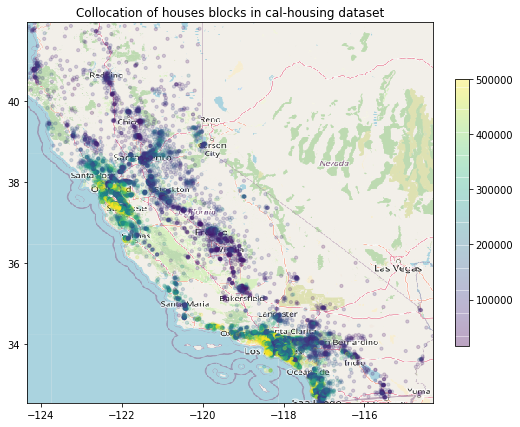

In [34]:
cal_map = plt.imread('cal_map.png')
fig, ax = plt.subplots(figsize = (8,7))
sc = ax.scatter(coord.longitude, coord.latitude, zorder=1, alpha= 0.2, c=medv.values, s=10)
ax.set_title('Collocation of houses blocks in cal-housing dataset')
ax.set_xlim(box[0],box[1])
ax.set_ylim(box[2],box[3])
ax.imshow(cal_map, zorder=0, extent = box, aspect= 'equal')
fig.colorbar(sc, fraction=.03)

We find out that the correlation between longitude and latitude is merely due to the shape of California. In addition, we see that the highest median house prices are located in the areas surrounding San Francisco and Los Angeles, that is, geographically, along the (South-)West coast. Intuitively, a good linear predictor $w$ will have its projection $(w_{lat}, w_{long})$ aligned with the North-East - South-West vector, as in this direction it looks like the median price of houses increases.

<hr>

We are almost ready to start the learning part of the project. The last thing to do is to create a copy of the dataset where an intercept is included, in alignement with what has been discussed in paragraph [Intercept](#Intercept).

In [35]:
calh1 = calh.copy()
calh1.insert(loc=0, column='ones', value=1)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h1><center>Learning of median house value predictors</center></h1>

<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

## Design matrix and labels
- `X` the design matrix of the original dataset.
- `X1` the design matrix of the original dataset plus a column of ones.
- `y` the original labels.
- `yc` the mean-centered labels.

In [36]:
X, X1, y, yc = calh.values, calh1.values, medv.values, normalize(medv.values, demean=True, standardize=False)

## PC's selection
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

We wish to recover a reasonable number of principal components to work with. We shall have a look at the singular values of the whole normalized matrix `X`, aware of the fact that PCD will be carried out on training and test sets separately though.

In [37]:
U, s, Wt = LA.svd(normalize(X.copy(), demean = True, standardize = True), full_matrices=False)

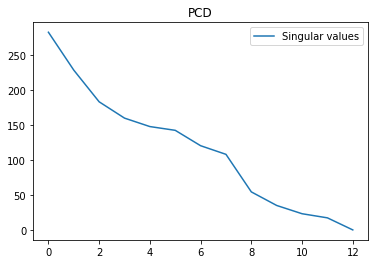

In [38]:
plt.title('PCD')
plt.plot(s, label='Singular values')
plt.legend()
plt.show()

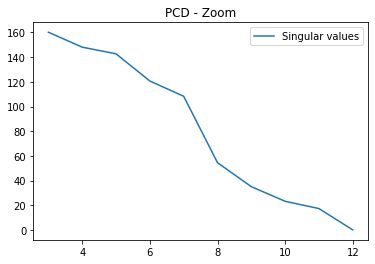

In [39]:
plt.title('PCD - Zoom')
plt.plot(range(3,s.size), s[3:], label='Singular values')
plt.legend()
plt.show()

The first $8$ components seem to retain the most of the variance, hence we pick them.

## Compared performances
<p style="text-align: right;">Go to <a href="#Index">Index</a>
    <br>Go to <a href="#Plots">Plot code</a></p>

In the following we will compare performances of several combinations of learners and pre-processing steps, taking care to showcase only the most reasonable combinations as advised by theory. Performances will be evaluated by plotting the "validation curve", namely the set of cross-validated training errors and risk estimates computed as alpha (the ridge hyperparameter) varies over a user-chosen range. In the following plots, for each learner we chose ranges of alpha so that the plotted validation curve captured the most significant trend of the errors (always increasing, U-shape, sharp increase at the beginning and then flat, etc.). Using the same alpha range for each learner would instead result in bad graphs: note that, as we change types of pre-processing, the alpha values that captured a certain trend for a predictor's error may not result in any tangible difference between the resulting errors of another predictor, i.e. a flat line. This is due to the scaling of features and is all but but surprising: the suitable order of magnitude for $\alpha$ to have any considerable impact on the minimization $(1)$ depends on the order of magnitude of the empirical risk and of the optimal weights, which are both affected by the type of pre-processing implemented.

In the graphs, the linked points represent the CV means for each $\alpha$: blue triangles for training error means ($\mu_{CV}^{\text{train}}$) and orange circles for test error means ($\mu_{CV}$). The shaded areas are the corresponding CV standard deviation bands. In addition, we highlighted the minimum CV risk and the minimum distance between train and test errors. These metrics will be useful to comment on accuracy and overfitting. To hide their labels, just set the flag variable `showMins` to `False`.

### Pre-processing + Ridge

In [40]:
# Set up the data for the plot
tot_r, tot_c = 3, 3
dens = 8
title = np.reshape([' '*256]*tot_r*tot_c , (tot_r,tot_c))
alphas = np.zeros((tot_r,tot_c,dens))
train_mean = np.zeros((tot_r,tot_c,dens))
train_std = np.zeros((tot_r,tot_c,dens))
test_mean = np.zeros((tot_r,tot_c,dens))
test_std = np.zeros((tot_r,tot_c,dens))

In [41]:
# Computations (~10s , AMD Ryzen 5 on Windows 10 with 8GB RAM)

# axs[0,0]
r, c = 0, 0
title[r,c] = 'resc + ridge'
alphas[r,c] = np.linspace(1,20,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=rescale, 
        demean=False, 
        standardize=False, 
        interval=[0,1], 
        exclude=[0]
    )
)

# axs[0,1]
r, c = 0, 1
title[r,c] = 'demean + ridge'
alphas[r,c] = np.linspace(1,9e3, dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=normalize, 
        demean=True, 
        standardize=False, 
        interval=None, 
        exclude=[0]
    )
)

# axs[0,2]
r, c = 0, 2
title[r,c] = 'stdize + ridge'
alphas[r,c] = np.linspace(1,5e3,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=normalize, 
        demean=False, 
        standardize=True, 
        interval=None, 
        exclude=[0]
    )
)


# axs[1,0]
r, c = 1, 0
title[r,c] = 'demean + stdize + ridge'
alphas[r,c] = np.linspace(1,5e3,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=normalize, 
        demean=True, 
        standardize=True, 
        interval=None, 
        exclude=[0]
    )
)

# axs[1,1]
r, c = 1, 1
title[r,c] = 'demean + sigma + ridge'
alphas[r,c] = np.linspace(1,5e3,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=sigma_std, 
        demean=True, 
        standardize=False, 
        interval=None, 
        exclude=[0]
    )
)

# axs[1,2]
r, c = 1, 2
title[r,c] = 'ridge'
alphas[r,c] = np.linspace(1,5e3,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=None, 
        demean=False, 
        standardize=False, 
        interval=None, 
        exclude=[]
    )
)

# axs[2,0]
r, c = 2, 0
title[r,c] = 'NO intercept: demean(y) + demean + std + ridge'
alphas[r,c] = np.linspace(1,5e3,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X,
        yc, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=normalize, 
        demean=True, 
        standardize=True, 
        interval=None, 
        exclude=[]
    )
)

# axs[2,1]
r, c = 2, 1
title[r,c] = 'NO intercept: demean(y) + demean + sigma + ridge'
alphas[r,c] = np.linspace(1,50,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X,
        yc, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=None, 
        transf2=sigma_std, 
        demean=True, 
        standardize=False, 
        interval=None, 
        exclude=[]
    )
)

# axs[2,2]
r, c = 2, 2
title[r,c] = 'NO intercept: demean(y) + resc + demean + ridge'
alphas[r,c] = np.linspace(1,20,dens)
train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c] = np.array(
    val_curve(
        ridge_w, 
        X,
        yc, 
        alphas[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=None,
        transf1=rescale, 
        transf2=normalize, 
        demean=True, 
        standardize=False, 
        interval=[0,1], 
        exclude=[]
    )
)

In [42]:
# Change to False to hide mins labels
showMins = True

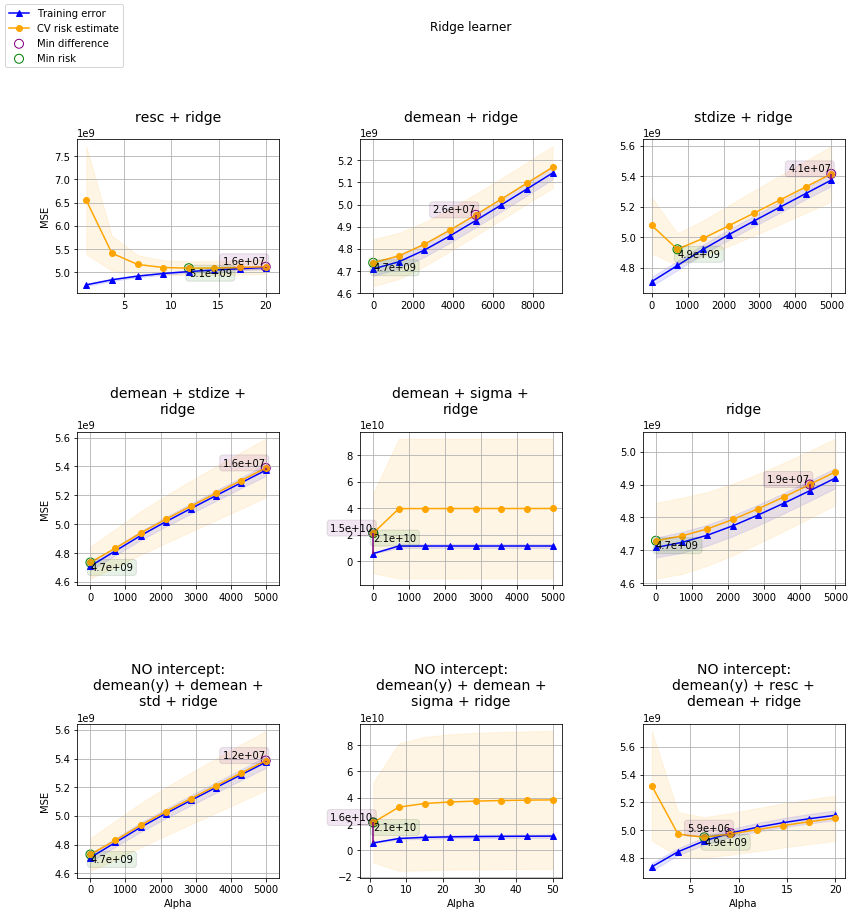

In [43]:
fig, axs = plt.subplots(tot_r,tot_c)
fig.set_size_inches(13., 8.5*3/2)
max_cpl_title = 20 # Max characters per line in any title
for r in range(tot_r):
    for c in range(tot_c):
        axs[r,c] = val_plot(axs[r,c], alphas[r,c], train_mean[r,c], train_std[r,c], test_mean[r,c], test_std[r,c], 
                            "\n".join(wrap(title[r,c], max_cpl_title)), showMins)
        if(c==0):
            axs[r,c].set_ylabel('MSE')
        if(r==(tot_r-1)):
            axs[r,c].set_xlabel('Alpha')

fig.suptitle('Ridge learner') 
fig.tight_layout()
plt.subplots_adjust(top=0.85, left=0.08, right=0.9, wspace= 0.4, hspace=0.9)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')

### Pre-processing 1 + PCD + Pre-processing 2 + Ridge
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

In [44]:
# Set up the data for the plot
tot_r2, tot_c2 = 3, 3 
dens2 = 8
title2 = np.reshape([' '*256]*tot_r2*tot_c2 , (tot_r2,tot_c2))
alphas2 = np.zeros((tot_r2,tot_c2,dens2))
train_mean2 = np.zeros((tot_r2,tot_c2,dens2))
train_std2 = np.zeros((tot_r2,tot_c2,dens2))
test_mean2 = np.zeros((tot_r2,tot_c2,dens2))
test_std2 = np.zeros((tot_r2,tot_c2,dens2))

In [45]:
# Computations (~20s , AMD Ryzen 5 on Windows 10 with 8GB RAM)

# axs[0,0]
r, c = 0, 0
title2[r,c] = 'demean + PCD + resc + ridge'
alphas2[r,c] = np.linspace(100,6e3,dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=normalize, 
        transf2=rescale, 
        demean=True, 
        standardize=False, 
        interval=[0,1], 
        exclude=[0]
    )
)

# axs[0,1]
r, c = 0, 1
title2[r,c] = 'demean + std + PCD + resc + ridge'
alphas2[r,c] = np.linspace(150,6e3, dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=normalize, 
        transf2=rescale, 
        demean=True, 
        standardize=True, 
        interval=[0,1], 
        exclude=[0]
    )
)

# axs[0,2]
r, c = 0, 2
title2[r,c] = 'std + PCD + resc + ridge'
alphas2[r,c] = np.linspace(100,2500,dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=normalize, 
        transf2=rescale, 
        demean=False, 
        standardize=True, 
        interval=[0,1], 
        exclude=[0]
    )
)

# axs[1,0]
r, c = 1, 0
title2[r,c] = 'resc + PCD + resc + ridge'
alphas2[r,c] = np.linspace(1,2500,dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=rescale, 
        transf2=rescale, 
        demean=False, 
        standardize=False, 
        interval=[0,1], 
        exclude=[0]
    )
)

# axs[1,1]
r, c = 1, 1
title2[r,c] = 'resc + PCD + std + ridge'
alphas2[r,c] = np.linspace(1,1e5, dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=rescale, 
        transf2=normalize, 
        demean=False, 
        standardize=True, 
        interval=[0,1], 
        exclude=[0]
    )
)

# axs[1,2]
r, c = 1, 2
title2[r,c] = 'resc + PCD + demean + std + ridge'
alphas2[r,c] = np.linspace(1,2500,dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=6,
        transf1=normalize, 
        transf2=rescale, 
        demean=True, 
        standardize=True, 
        interval=[0,1], 
        exclude=[0]
    )
)

# axs[2,0]
r, c = 2, 0
title2[r,c] = 'demean + PCD + ridge'
alphas2[r,c] = np.linspace(1,1e11,dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=normalize, 
        transf2=None, 
        demean=True, 
        standardize=False, 
        interval=None, 
        exclude=[0]
    )
)

# axs[2,1]
r, c = 2, 1
title2[r,c] = 'demean + std + PCD + ridge'
alphas2[r,c] = np.linspace(1,1e4,dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=normalize, 
        transf2=None, 
        demean=True, 
        standardize=True, 
        interval=None, 
        exclude=[0]
    )
)

# axs[2,2]
r, c = 2, 2
title2[r,c] = 'demean + PCD + sigma + ridge'
alphas2[r,c] = np.linspace(1,1e4,dens2)
train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c] = np.array(
    val_curve(
        ridge_w, 
        X1,
        y, 
        alphas2[r,c], 
        seed=13, 
        folds=5, 
        loss_fct=sq_loss, 
        PC=8,
        transf1=normalize, 
        transf2=sigma_std, 
        demean=True, 
        standardize=False, 
        interval=None, 
        exclude=[0]
    )
)

In [46]:
# Change to False to hide mins labels
showMins2 = True

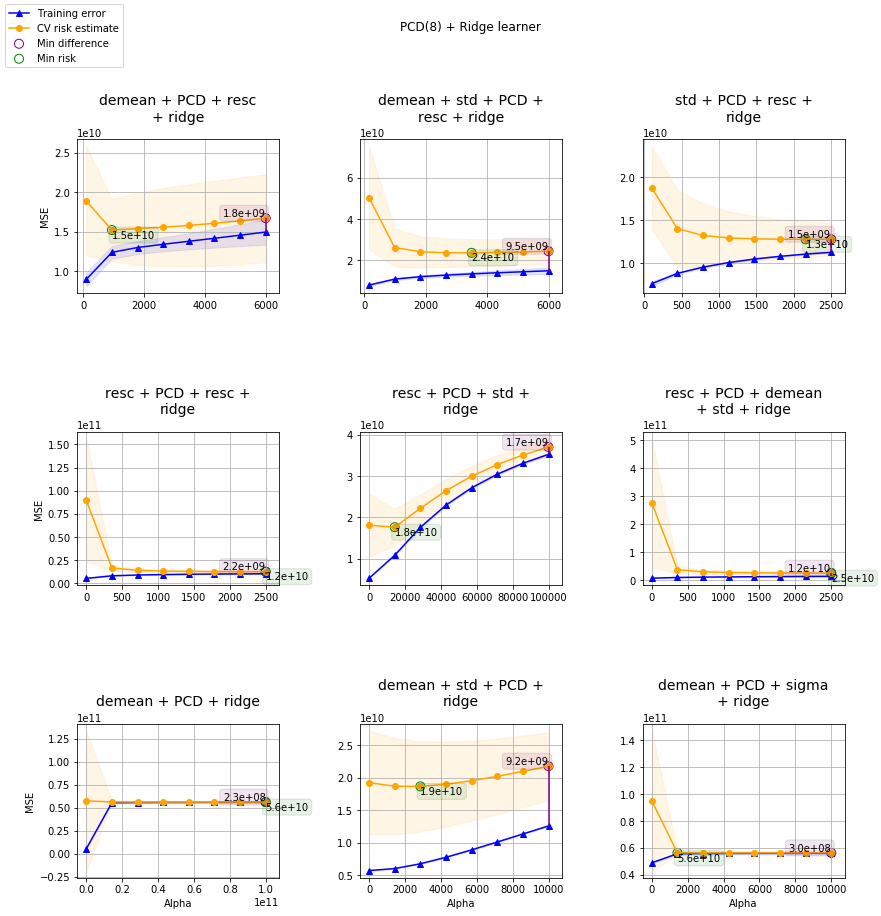

In [47]:
fig2, axs2 = plt.subplots(tot_r2,tot_c2)
fig2.set_size_inches(13., 8.5*3/2)
max_cpl_title2 = 20 # Max characters per line in any title
for r in range(tot_r2):
    for c in range(tot_c2):
        axs2[r,c] = val_plot(axs2[r,c], alphas2[r,c], train_mean2[r,c], train_std2[r,c], test_mean2[r,c], test_std2[r,c], 
                            "\n".join(wrap(title2[r,c], max_cpl_title2)), showMins2)
        if(c==0):
            axs2[r,c].set_ylabel('MSE')
        if(r==(tot_r2-1)):
            axs2[r,c].set_xlabel('Alpha')

fig2.suptitle('PCD(8) + Ridge learner') 
fig2.tight_layout()
plt.subplots_adjust(top=0.85, left=0.08, right=0.9, wspace= 0.4, hspace=0.9)
handles2, labels2 = axs2[0,0].get_legend_handles_labels()
fig2.legend(handles2, labels2, loc='upper left')

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h1><center>Conclusion</center></h1>
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

The graphs drawn in [Comparing performances](#Comparing-performances) help us outline a ranking of the predictors. First of all, Principal Component Decomposition happened to worsen the overall error by a factor of at least $2$. Indeed, all CV risk minimums of learners with PCD stand at $1.2\times 10^{10}$ or more, while without PCD, CV risks minimums do not exceed $6.5\times 10^9$. To comment on this fact, we can have a look again at the singular values curve of the mean-centered matrix $\overline{X}$ in [PC's selection](#PC's-selection): it shows a nearly linear decay of singular values, while typically a sharp decrease of the first s.v. followed by a moderate decrase towards 0 signals a higher importance of the first PC's over the last ones. Conversely, here it seems like we can't reduce dimensionality without losing valuable information. Regretfully, we have to exclude such predictors from the top of our ranking.

Among the non-PCD predictors, those that look like to perfrom better are <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>ridge</em></span>, <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>resc + ridge</em></span> and <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>NO intercept: demean(y) + resc + demean + ridge</em></span>. Such predictors reach their minimum CV risk not far away from where the minimum distance between training and test errors occurs and both these quantities are low. This is a good sign since it means that one can bring the risk down without incurring overfitting, which is otherwise the case of <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>demean + sigma + ridge</em></span> and <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>NO intercept: demean(y) + demean + sigma + ridge</em></span> predictors: $\Sigma$-standardization do not seem to improve accuracy here. In other words, only the first three mentioned predictors display a good bias-variance trade-off. Here below are the metrics: use `minsTable(i,j)` to get the CV risk minimizer and CV  difference minimizer of the predictor corresponding to plot (i,j) in figure 1.

In [48]:
xmin = np.zeros((tot_r,tot_c), dtype=float)
xmind = np.zeros((tot_r,tot_c), dtype=float)
ymin = np.zeros((tot_r,tot_c), dtype=float)
ymind = np.zeros((tot_r,tot_c), dtype=float)
dmin = np.zeros((tot_r,tot_c), dtype=float)
dmind = np.zeros((tot_r,tot_c), dtype=float)
imin = np.zeros((tot_r,tot_c), dtype = int)
imind = np.zeros((tot_r,tot_c), dtype = int)
indx = np.reshape([' '*256]*tot_r*tot_c, (tot_r,tot_c))
indxd = np.reshape([' '*256]*tot_r*tot_c, (tot_r,tot_c))
tit = np.reshape([' '*256]*tot_r*tot_c, (tot_r,tot_c))

for r in range(tot_r):
    for c in range(tot_c):
        imin[r,c] = np.argmin(test_mean[r,c]).astype(int)
        imind[r,c] = np.argmin(np.abs(test_mean[r,c]-train_mean[r,c])).astype(int)
        xmin[r,c] = alphas[r,c,imin[r,c]]
        xmind[r,c] = alphas[r,c,imind[r,c]]
        ymin[r,c] = test_mean[r,c,imin[r,c]]
        ymind[r,c] = test_mean[r,c,imind[r,c]]
        dmin[r,c] = np.abs(ymin[r,c] - train_mean[r,c,imin[r,c]])
        dmind[r,c] = np.abs(ymind[r,c] - train_mean[r,c,imind[r,c]])
        indx[r,c] = '{:1.1f}'.format(xmin[r,c]) + " $= \\underset{ \\alpha \\in [" + str(int(alphas[r,c,0])) + "," + str(int(alphas[r,c,-1]))  + "]}{ \\text{argmin} } \\mu_{CV}(5, \\alpha)$ "
        indxd[r,c] = '{:1.1f}'.format(xmind[r,c]) + " $= \\underset{ \\alpha \\in [" + str(int(alphas[r,c,0])) + "," + str(int(alphas[r,c,-1])) + "]}{ \\text{argmin} } \\mid \\mu^{\\text{train}}_{CV} - \\mu_{CV} \\mid (5, \\alpha)$ "
        tit[r,c] = '<span style="font-family: \'Trebuchet MS\', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>' + title[r,c] + '</em></span>'
            
def minsTable(r,c):
    return Markdown(tit[r,c] + """
    
|- - - - - - - - - - - - - - Alpha - - - - - - - - - - - - - - -|Cv risk|Cv difference|
|:-:|:-:|:-:|
|{s1}|{r1}|{d1}|
|{s2}|{r2}|{d2}|
    """.format(s1=indx[r,c], r1="{:0.4e}".format(ymin[r,c]), d1="{:0.4e}".format(dmin[r,c]), 
               s2=indxd[r,c], r2="{:0.4e}".format(ymind[r,c]), d2="{:0.4e}".format(dmind[r,c]))
    )

In [49]:
minsTable(0,0)

<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>resc + ridge</em></span>
    
|- - - - - - - - - - - - - - Alpha - - - - - - - - - - - - - - -|Cv risk|Cv difference|
|:-:|:-:|:-:|
|11.9 $= \underset{ \alpha \in [1,20]}{ \text{argmin} } \mu_{CV}(5, \alpha)$ |5.0921e+09|7.2986e+07|
|20.0 $= \underset{ \alpha \in [1,20]}{ \text{argmin} } \mid \mu^{\text{train}}_{CV} - \mu_{CV} \mid (5, \alpha)$ |5.1222e+09|1.6070e+07|
    

In [50]:
minsTable(0,2)

<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>stdize + ridge</em></span>
    
|- - - - - - - - - - - - - - Alpha - - - - - - - - - - - - - - -|Cv risk|Cv difference|
|:-:|:-:|:-:|
|715.1 $= \underset{ \alpha \in [1,5000]}{ \text{argmin} } \mu_{CV}(5, \alpha)$ |4.9202e+09|1.0605e+08|
|5000.0 $= \underset{ \alpha \in [1,5000]}{ \text{argmin} } \mid \mu^{\text{train}}_{CV} - \mu_{CV} \mid (5, \alpha)$ |5.4146e+09|4.0887e+07|
    

In [51]:
minsTable(2,2)

<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>NO intercept: demean(y) + resc + demean + ridge</em></span>
    
|- - - - - - - - - - - - - - Alpha - - - - - - - - - - - - - - -|Cv risk|Cv difference|
|:-:|:-:|:-:|
|6.4 $= \underset{ \alpha \in [1,20]}{ \text{argmin} } \mu_{CV}(5, \alpha)$ |4.9479e+09|2.5749e+07|
|9.1 $= \underset{ \alpha \in [1,20]}{ \text{argmin} } \mid \mu^{\text{train}}_{CV} - \mu_{CV} \mid (5, \alpha)$ |4.9717e+09|5.9216e+06|
    

If this one were the top 3 of our leaderbord, then <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>NO intercept: demean(y) + resc + demean + ridge</em></span> would be in the first place: it is performing very well at $\alpha=9.1$, showing only a little ($\sim 10^7$) increase in the CV risk w.r.t. to its minimum, but a substantial decrease (by more than a factor of $5$, reaching an order of magnitude of $\sim 10^6$) in the CV difference.

The predictor with the scale-invariant porperty, <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>demean + stdize + ridge</em></span>, is also performing well, but proves to have a worse bias-variance trade-off.

In [52]:
minsTable(1,0)

<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif; color: rgb(184, 49, 47); background-color: rgb(239, 239, 239);"><em>demean + stdize + ridge</em></span>
    
|- - - - - - - - - - - - - - Alpha - - - - - - - - - - - - - - -|Cv risk|Cv difference|
|:-:|:-:|:-:|
|1.0 $= \underset{ \alpha \in [1,5000]}{ \text{argmin} } \mu_{CV}(5, \alpha)$ |4.7341e+09|2.5313e+07|
|5000.0 $= \underset{ \alpha \in [1,5000]}{ \text{argmin} } \mid \mu^{\text{train}}_{CV} - \mu_{CV} \mid (5, \alpha)$ |5.3893e+09|1.5594e+07|
    

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h1><center>Bibliography</center></h1>
<p style="text-align: right;">Go to <a href="#Index">Index</a></p>

[1]   MARQUARDT, D. W., SNEE, R. D. [Ridge regression in practice](https://www.jstor.org/stable/2683673). 1975. *The American Statistician*, 29. 3–20.


[2] SARDY, S. [On the practice of rescaling covariates](https://doi.org/10.1111/j.1751-5823.2008.00050.x). 2008. *International Statistical Review*, 76(2). 285-297.


[3] SHALEV-SHWARTZ, S., BEN-DAVID, S.. Understanding Machine Learning: From Theory to Algorithms. 2014. *Cambridge University Press*. Ch. 13, 23.1.